<h1 align="center" style="color:white;background-color:#247881;padding:40px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Dataset Processing for Crop Yield Prediction
</h1>

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;border-radius:10px;font-family:Montserrat"> 
    Import Libraries 
</h2>

In [2]:
# work with data
import pandas as pd
import numpy as np

# import library to convert string to integer
from sklearn.preprocessing import LabelEncoder

# data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

# warnings
import warnings
warnings.filterwarnings("ignore")

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;border-radius:10px;font-family:Montserrat"> 
    Import Dataset 
</h2>

In [3]:
# import
df = pd.read_csv("../../raw_data/prediction/raw_yield_prediction_dataset.csv")

# print
df.head()

,State_Name,Season,Crop,Area,Soil_Type,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2000.00
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2061.00
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,2083.00
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,1525.00
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,805.85


<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Exploration
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Utility class
</h4>

In [4]:
class c:
    HEADER      = '\033[95m'
    BLUE        = '\033[94m'
    CYAN        = '\033[96m'
    GREEN       = '\033[92m'
    WARNING     = '\033[93m'
    FAIL        = '\033[91m'
    ENDC        = '\033[0m'
    BOLD        = '\033[1m'
    UNDERLINE   = '\033[4m'

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Top 5 elements of data
</h4>

In [5]:
df.head()

,State_Name,Season,Crop,Area,Soil_Type,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2000.00
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2061.00
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,2083.00
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,1525.00
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,805.85


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Bottom 5 elements of data
</h4>

In [6]:
df.tail()

,State_Name,Season,Crop,Area,Soil_Type,Production
23315,Madhya Pradesh,Kharif,Groundnut,5345.0,Sandy,5960.0
23316,Madhya Pradesh,Kharif,Groundnut,5159.0,Sandy,5543.0
23317,Madhya Pradesh,Kharif,Groundnut,6088.0,Sandy,8493.0
23318,Madhya Pradesh,Kharif,Groundnut,6599.0,Sandy,7842.0
23319,Madhya Pradesh,Kharif,Groundnut,500.0,Sandy,500.0


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Total size of data (row * column)
</h4>

In [7]:
print(f"\nSize of dataframe is:{c.BOLD} {str(df.size)} {c.ENDC}\n")


Size of dataframe is: 139920 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    shape of data (row, column)
</h4>

In [8]:
print(f"\nShape of dataframe is:{c.BOLD} {str(df.shape)} {c.ENDC}\n")


Shape of dataframe is: (23320, 6) 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Show all columns
</h4>

In [9]:
print(f"\nList of columns in dataframe::{c.BOLD} {str(df.columns.tolist())} {c.ENDC}\n")


List of columns in dataframe:: ['State_Name', 'Season', 'Crop', 'Area', 'Soil_Type', 'Production'] 



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Datatype of all columns and dataframe
</h4>

In [10]:
print(f"\nDatatypes present in dataframe:\n\n{c.BOLD}{str(df.dtypes)}{c.BOLD}\n")


Datatypes present in dataframe:

State_Name     object
Season         object
Crop           object
Area          float64
Soil_Type      object
Production    float64
dtype: object



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Check for all unique values in different column
</h4>

In [11]:
print(f"\nAll unique values in state column:\n\n{c.BOLD}{str(df['State_Name'].unique().tolist())}{c.ENDC}\n")
print(f"\nAll unique values in season column:\n\n{c.BOLD}{str(df['Season'].unique().tolist())}{c.ENDC}\n")
print(f"\nAll unique values in Crop column:\n\n{c.BOLD}{str(df['Crop'].unique().tolist())}{c.ENDC}\n")
print(f"\nAll unique values in Soil Type column:\n\n{c.BOLD}{str(df['Soil_Type'].unique().tolist())}{c.ENDC}\n")


All unique values in state column:

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Goa', 'Karnataka', 'Kerala', 'Meghalaya', 'Puducherry', 'Tamil Nadu', 'West Bengal', 'Bihar', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Gujarat', 'Haryana', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Rajasthan', 'Telangana', 'Uttar Pradesh', 'Arunachal Pradesh', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Nagaland', 'Odisha', 'Uttarakhand', 'Mizoram', 'Punjab', 'Tripura']


All unique values in season column:

['Kharif', 'Whole Year', 'Rabi', 'Winter', 'Autumn', 'Summer']


All unique values in Crop column:

['Arecanut', 'Banana', 'Dry chillies', 'Coconut', 'Cotton (lint)', 'Dry ginger', 'Groundnut']


All unique values in Soil Type column:

['Laterite', 'Clayey', 'loamy', 'Sandy', 'Black']



<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Check for any null value in dataframe
</h4>

In [12]:
print(f"\nList of null values in dataframe:\n\n{c.BOLD}{str(df.isnull().sum())}{c.BOLD}")


List of null values in dataframe:

State_Name    0
Season        0
Crop          0
Area          0
Soil_Type     0
Production    0
dtype: int64


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Overall information of entire dataset
</h4>

In [13]:
df.describe()

,Area,Production
count,23320.000000,2.332000e+04
mean,11973.017728,5.597802e+06
std,46326.621143,5.474921e+07
min,1.000000,0.000000e+00
25%,91.000000,1.340000e+02
50%,553.500000,1.235500e+03
75%,3199.000000,1.349475e+04
max,877029.000000,1.250800e+09


<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Visualization
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Pairplot analysis
</h4>

<Figure size 1368x1224 with 0 Axes>

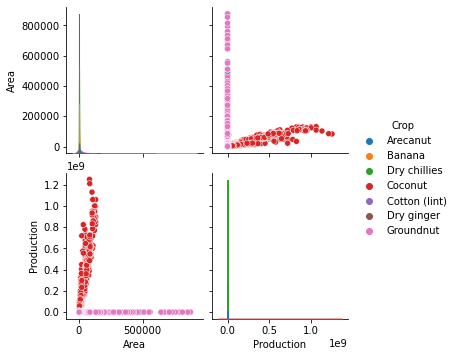

In [14]:
plt.figure(figsize = (19,17))
sns.pairplot(df, hue = "Crop")

plt.show()

<h2 align="center" style="color:white;background-color:#30AADD;padding:20px;margin-top:80px;margin-bottom:80px;border-radius:10px;font-family:Montserrat"> 
    Data Processing
</h2>

<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Separate input and output column
</h4>

In [15]:
df

,State_Name,Season,Crop,Area,Soil_Type,Production
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2000.00
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,2061.00
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,2083.00
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,1525.00
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,805.85
...,...,...,...,...,...,...
23315,Madhya Pradesh,Kharif,Groundnut,5345.0,Sandy,5960.00
23316,Madhya Pradesh,Kharif,Groundnut,5159.0,Sandy,5543.00
23317,Madhya Pradesh,Kharif,Groundnut,6088.0,Sandy,8493.00
23318,Madhya Pradesh,Kharif,Groundnut,6599.0,Sandy,7842.00


In [16]:
# store input parameters in 'inputs' variable
inputs = df.drop('Production', axis = 'columns')

# store corp parameter in 'outputs' variable
outputs = df[['Production']]

In [17]:
inputs

,State_Name,Season,Crop,Area,Soil_Type
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite
...,...,...,...,...,...
23315,Madhya Pradesh,Kharif,Groundnut,5345.0,Sandy
23316,Madhya Pradesh,Kharif,Groundnut,5159.0,Sandy
23317,Madhya Pradesh,Kharif,Groundnut,6088.0,Sandy
23318,Madhya Pradesh,Kharif,Groundnut,6599.0,Sandy


In [18]:
outputs

,Production
0,2000.00
1,2061.00
2,2083.00
3,1525.00
4,805.85
...,...
23315,5960.00
23316,5543.00
23317,8493.00
23318,7842.00


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Convert all strings to integer
</h4>

In [19]:
# Encoding label (i.e string format) to integer for training and testing model
label_encoder = LabelEncoder()

In [20]:
# create separate column for State_Name values

inputs['State_Name_Converted'] = label_encoder.fit_transform(inputs['State_Name'])
inputs.head()

,State_Name,Season,Crop,Area,Soil_Type,State_Name_Converted
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,0
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,0
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,0


In [21]:
{index : label for index, label in enumerate(label_encoder.classes_)}

{0: 'Andaman and Nicobar Islands',
 1: 'Andhra Pradesh',
 2: 'Arunachal Pradesh',
 3: 'Assam',
 4: 'Bihar',
 5: 'Chhattisgarh',
 6: 'Dadra and Nagar Haveli',
 7: 'Goa',
 8: 'Gujarat',
 9: 'Haryana',
 10: 'Himachal Pradesh',
 11: 'Jammu and Kashmir ',
 12: 'Karnataka',
 13: 'Kerala',
 14: 'Madhya Pradesh',
 15: 'Maharashtra',
 16: 'Manipur',
 17: 'Meghalaya',
 18: 'Mizoram',
 19: 'Nagaland',
 20: 'Odisha',
 21: 'Puducherry',
 22: 'Punjab',
 23: 'Rajasthan',
 24: 'Tamil Nadu',
 25: 'Telangana',
 26: 'Tripura',
 27: 'Uttar Pradesh',
 28: 'Uttarakhand',
 29: 'West Bengal'}

In [22]:
# create separate column for Season values

inputs['Season_Converted'] = label_encoder.fit_transform(inputs['Season'])
inputs.head()

,State_Name,Season,Crop,Area,Soil_Type,State_Name_Converted,Season_Converted
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,0,4
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,0,4
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,0,4


In [23]:
{index : label for index, label in enumerate(label_encoder.classes_)}

{0: 'Autumn',
 1: 'Kharif',
 2: 'Rabi',
 3: 'Summer',
 4: 'Whole Year',
 5: 'Winter'}

In [28]:
# create separate column for Crop values

inputs['Crop_Converted'] = label_encoder.fit_transform(inputs['Crop'])
inputs.head()

,State_Name,Season,Crop,Area,Soil_Type,State_Name_Converted,Season_Converted,Crop_Converted,Soil_Type_Converted
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1,0,2
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1,0,2
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,0,4,0,2
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,0,4,0,2
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,0,4,0,2


In [29]:
{index : label for index, label in enumerate(label_encoder.classes_)}

{0: 'Arecanut',
 1: 'Banana',
 2: 'Coconut',
 3: 'Cotton (lint)',
 4: 'Dry chillies',
 5: 'Dry ginger',
 6: 'Groundnut'}

In [30]:
# create separate column for soil_type values

inputs['Soil_Type_Converted'] = label_encoder.fit_transform(inputs['Soil_Type'])
inputs.head()

,State_Name,Season,Crop,Area,Soil_Type,State_Name_Converted,Season_Converted,Crop_Converted,Soil_Type_Converted
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1,0,2
1,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,Laterite,0,1,0,2
2,Andaman and Nicobar Islands,Whole Year,Arecanut,1258.0,Laterite,0,4,0,2
3,Andaman and Nicobar Islands,Whole Year,Arecanut,1261.0,Laterite,0,4,0,2
4,Andaman and Nicobar Islands,Whole Year,Arecanut,1264.7,Laterite,0,4,0,2


In [31]:
{index : label for index, label in enumerate(label_encoder.classes_)}

{0: 'Black', 1: 'Clayey', 2: 'Laterite', 3: 'Sandy', 4: 'loamy'}

In [32]:
# drop string column

inputs_converted = inputs.drop(['State_Name', 'Season', 'Crop', 'Soil_Type'], axis = 'columns')
inputs_converted

,Area,State_Name_Converted,Season_Converted,Crop_Converted,Soil_Type_Converted
0,1254.0,0,1,0,2
1,1254.0,0,1,0,2
2,1258.0,0,4,0,2
3,1261.0,0,4,0,2
4,1264.7,0,4,0,2
...,...,...,...,...,...
23315,5345.0,14,1,6,3
23316,5159.0,14,1,6,3
23317,6088.0,14,1,6,3
23318,6599.0,14,1,6,3


<h4 align="left" style="color:white;background-color:#94DAFF;padding:20px;margin-top:40px;border-radius:10px;font-family:Montserrat;display:inline-block;width:500px"> 
    Store processed dataset
</h4>

In [33]:
inputs_converted.to_csv("../../processed_data/prediction/processed_yield_prediction_inputs.csv")
outputs.to_csv("../../processed_data/prediction/processed_yield_prediction_outputs.csv")